# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Revised: Monday, May 15th  
Due: Tuesday, May 16    

*Antonio Gomez*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

** Update (5/15) **: you may use the equations of motion from exercise 8.14 of the book. This assumes equal masses and equal length pendulum rods.

<img src="HW5_EOM.png">

** Check **: for the following parameters:

`g = 9.8`  
`dt = 0.01`  


`L1 = 1.0`  
`L2 = 1.0`  
`m1 = 1.0`  
`m2 = 1.0`  

`omega1_init = 0.0`  
`omega2_init = 0.0`

I obtained:

<img src="HW5_Prob1.png">

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos

L1=1.0
L2=1.0
m1=1.0
m2=1.0
g=9.8
dt=0.01
tf=10.0
thi =2
thii=2
omi=0.0
omii=0.0

def f1(th1,th2,om1,om2,t):
    return om1
    
def f2(th1,th2,om1,om2,t):
    return om2

def h1(th1,th2,om1,om2,t):
    return -((om1**2)*sin(2*th1-2*th2)+2*(om2**2)*sin(th1-th2)+(g/L1)*(sin(th2-2*th2)+3*sin(th1)))/(3-cos(2*th1-2*th2))

def h2(th1,th2,om1,om2,t):
    return ((4*om1**2)*sin(th1-th2)+(om2**2)*sin(2*th1-2*th2)+2*(g/L2)*(sin(2*th1-th2)-sin(th2)))/(3-cos(2*th1-2*th2)) 

#######################################

tpoints = np.arange(0,tf,dt)

def time_and_angles():

    th1p = []
    th2p = []
    om1p = []
    om2p = []
    
    
    th1 = thi
    th2 = thii

    om1 = omi
    om2 = omii
    
    for t in tpoints:
        
        th1p.append(th1)
        th2p.append(th2)
        om1p.append(om1)
        om2p.append(om2)
        ##########################################
        
        k1i = dt*f1(th1,th2,om1,om2,t)
        k2i = dt*f1(th1p[-1]+.5*k1i,th2p[-1]+.5*k1i,om1,om2,t)
        th1 +=k2i
        
        k1ii =dt*h2(th1,th2,om1,om2,t)
        k2ii =dt*f2(th1p[-1]+.5*k1i,th2p[-1]+.5*k1i,om1,om2,t)
        th2 +=k2ii
        ##########################################       
      
        k1i = dt*h1(th1,th2,om1,om2,t)
        k2i = dt*h1(th1p[-1]+.5*k1i,th2p[-1]+.5*k1i,om1,om2,t)    
        om1 += k2i
        
        k1ii =dt*h2(th1,th2,om1,om2,t)
        k2ii =dt*h2(th1p[-1]+.5*k1i,th2p[-1]+.5*k1i,om1,om2,t)
        om2 += k2ii


    tt = np.array(tpoints)
    th1s = np.array(th1p)
    th2s = np.array(th2p)
    om1s = np.array(om1p)
    om2s = np.array(om2p)
    
    return tt, th1s, th2s, om1s, om2s
    


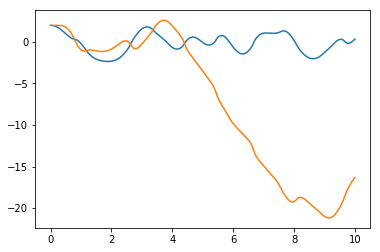

In [107]:
time, th1, th2, om1, om2 = time_and_angles()
x1=np.sin(th1/15)
y1=np.cos(th1/15)
x2=np.sin(th2/15)
y2=np.cos(th2/15)
plt.plot(time,th1)
plt.plot(time,th2)
plt.show()

#I dont really know where I went wrong

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI) ... *no, it turns out that this is really hard.*

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

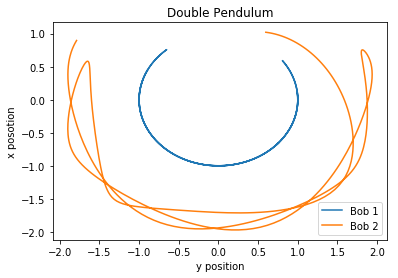

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
from math import cos as cos


g = 9.8
dt = 0.01
L1 = 1.0
L2 = 1.0
m1 = 1.0
m2 = 1.0
omega1_init = 0.0
omega2_init = 0.0
theta1_init = -90.0
theta2_init = -90.0

l = 1.0
t_final = 5.0 

def theta_one_dot(theta_1, theta_2, omega_1, omega_2, t):
    """d(theta1)/dt"""
    return omega_1

def omega_one_dot(theta_1, theta_2, omega_1, omega_2, t):
    """d(omega_1)/dt"""
    return -((omega_1**2)*sin(2*theta_1-2*theta_2)+2*(omega_2**2)*sin(theta_1-theta_2)+(g/l)*(sin(theta_1 - 2*theta_2) + 3*sin(theta_1)))/(3-cos(2*theta_1-2*theta_2))

def theta_two_dot(theta_1, theta_2, omega_1, omega_2, t):
    """d(theta_2)/dt"""
    return omega_2
def omega_two_dot(theta_1, theta_2, omega_1, omega_2, t):
    """d(omega_2)/dt"""
    return (4*(omega_1**2)*sin(theta_1-theta_2) + (omega_2**2)*sin(2*theta_1-2*theta_2) + 2*(g/l)*(sin(2*theta_1-theta_2)-sin(theta_2)))/(3-cos(2*theta_1-2*theta_2))


def time_and_angles_leapfrog():
    theta_1 = theta1_init
    theta_2 = theta2_init
    omega_1 = omega1_init
    omega_2 = omega2_init

    tpoints = np.arange(0,t_final,dt)

    theta_one_points = []
    omega_one_points = []
    theta_two_points = []
    omega_two_points = []

    theta_one_half = theta1_init + 0.5*dt*theta_one_dot(theta1_init, theta2_init, omega1_init, omega2_init, 0)
    omega_one_half = omega1_init + 0.5*dt*omega_one_dot(theta1_init, theta2_init, omega1_init, omega2_init, 0)

    theta_two_half = theta2_init + 0.5*dt*theta_two_dot(theta1_init, theta2_init, omega1_init, omega2_init, 0)
    omega_two_half = omega2_init + 0.5*dt*omega_two_dot(theta1_init, theta2_init, omega1_init, omega2_init, 0)

    for t in tpoints: 
    
        theta_one_points.append(theta_1)
        omega_one_points.append(omega_1)
        theta_two_points.append(theta_2)
        omega_two_points.append(omega_2)
    
        theta_1 += dt * theta_one_dot(theta_one_half, theta_two_half,omega_one_half, omega_two_half, t + .5*dt)    
        theta_2 += dt * theta_two_dot(theta_one_half, theta_two_half,omega_one_half, omega_two_half, t + .5*dt)
        omega_1 += dt * omega_one_dot(theta_one_half, theta_two_half, omega_one_half, omega_two_half, t + .5*dt)
        omega_2 += dt * omega_two_dot(theta_one_half, theta_two_half, omega_one_half, omega_two_half, t + .5*dt) 
        
        
        theta_one_half += dt * theta_one_dot(theta_1, theta_2, omega_1, omega_2, t + dt)
        theta_two_half += dt * theta_two_dot(theta_1, theta_2, omega_1, omega_2, t + dt)
        omega_one_half += dt * omega_one_dot(theta_1, theta_2, omega_1,omega_2, t + dt)
        omega_two_half += dt * omega_two_dot(theta_1, theta_2, omega_1,omega_2, t + dt)
    
    
    
    
    
    
    tt = np.array(tpoints)
    thetas1 = np.array(theta_one_points)
    omegas1 = np.array(omega_one_points)
    thetas2 = np.array(theta_two_points)
    omegas2 = np.array(omega_two_points)
    return tt, thetas1, omegas1, thetas2, omegas2


times, thetas1_lf, omegas1_lf, thetas2_lf, omegas2_lf = time_and_angles_leapfrog()

x1 = l*np.sin(thetas1_lf)
y1 = -l*np.cos(thetas1_lf)
x2 = l*np.sin(thetas1_lf) + l*np.sin(thetas2_lf)
y2 = -l*np.cos(thetas1_lf) - l*np.cos(thetas2_lf)

plt.plot(x1, y1, label='Bob 1')
plt.plot(x2, y2, label='Bob 2')
plt.title("Double Pendulum")
plt.xlabel('y position')
plt.ylabel('x posotion')
plt.legend()
plt.show()

In [7]:
import numpy as np

# Constants
M = 10# grid squares per side
V = 0      
target = 1e-2  # target accuracy

# arrays
phi = np.zeros([M+1,M+1],float) # initialize
phi[0,:] = 0
phiprime = np.zeros([M+1, M+1],float) # container for new values


# print(phi)

# Main Loop
delta = 1.0
while delta > target:
    # calculate new values of the potential

    for i in range(M+1):
        for j in range(M+1):

            # if boundary
            if i==0 or i==M or j==0 or j==M :
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4.
                
            phiprime[8,8] = 1
            phiprime[2,2] = -1
    
    # NOTE: indentation is very important!
    # convergence check
    delta = np.max(np.abs(phi-phiprime))
            
    # swap arrays
    phi, phiprime = phiprime, phi

            
#print(phi)

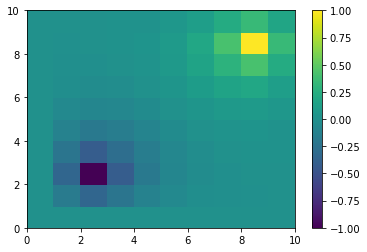

In [8]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.show()
